## Logistic Regression
## Here with the help of logistic regression model,we predicting that the employ left the company or stay in company.

In [56]:
# Importing some libraries which we require
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
from IPython import get_ipython

In [57]:
# Importing the data on which we work
Data=pd.read_csv("hr_data.csv")
Data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [58]:
# seeing infomation of aur data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [59]:
# Statictics information of data
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [60]:
# Shape of data shows number of rows and number of columns
Data.shape

(14999, 10)

In [61]:
# Name of all columns
Data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [62]:
# Sum of duplicate rows in data
Data.duplicated().sum()

3008

In [63]:
# Drop the duplicate rows
Data.drop_duplicates(inplace=True)
Data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [64]:
# Sum of duplicate values in data
Data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [65]:
# Unique valce in the columns
Data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [66]:
# Count of unique value of the data
for i in Data[["number_project","time_spend_company","promotion_last_5years","salary"]]:
    print(Data.value_counts(i))
    print()      

number_project
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: count, dtype: int64

time_spend_company
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64



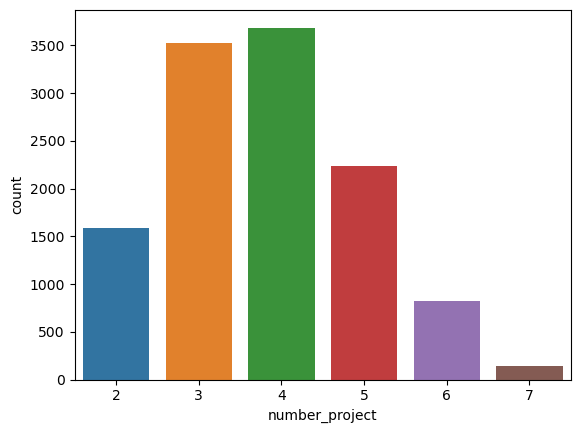

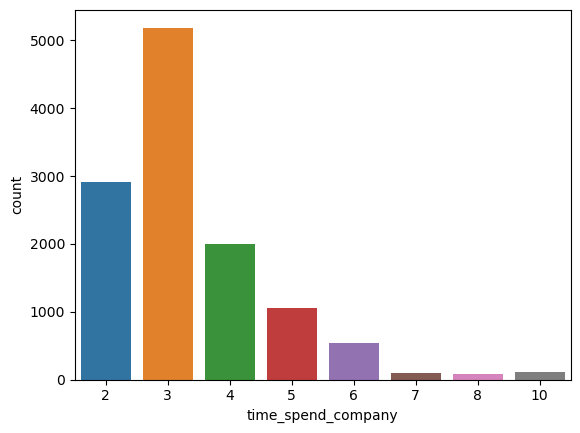

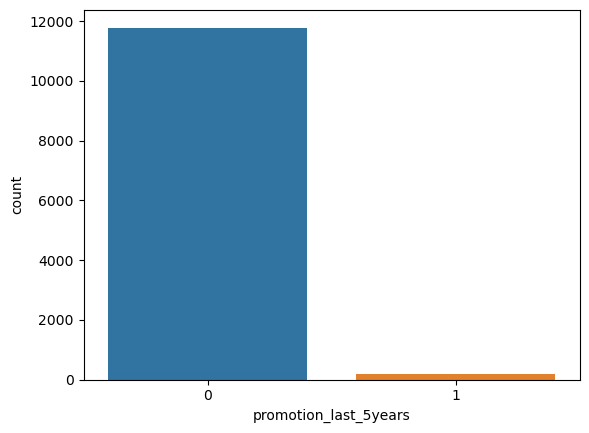

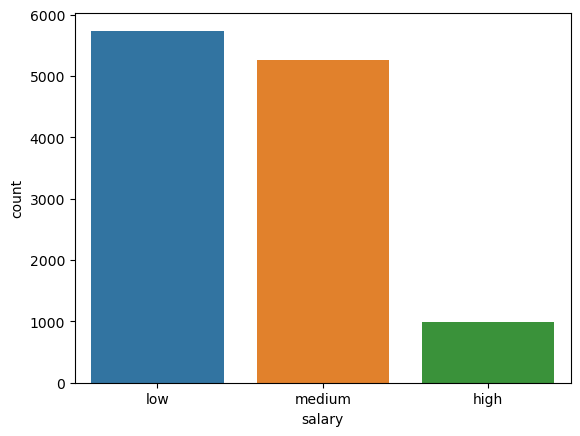

In [67]:
# Seeeing the unique value on graph
for i in ["number_project", "time_spend_company", "promotion_last_5years", "salary"]:
    sns.countplot(data=Data,x=i)
    plt.show()

In [68]:
# Convert cetogorical into numarical
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in Data.columns:
    if Data[i].dtypes=="object":
        Data[i]=lab.fit_transform(Data[i])
Data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,4,0
11996,0.74,0.95,5,266,10,0,0,1,4,0
11997,0.85,0.54,3,185,10,0,0,1,4,0
11998,0.33,0.65,3,172,10,0,0,1,5,0


In [69]:
# Dividing the data in x and y
x=Data.drop("left",axis=1)
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,4,0
11996,0.74,0.95,5,266,10,0,1,4,0
11997,0.85,0.54,3,185,10,0,1,4,0
11998,0.33,0.65,3,172,10,0,1,5,0


In [70]:
y=Data["left"]
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [71]:
# Spliting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,train_size=.80)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9592, 9), (2399, 9), (9592,), (2399,))

In [72]:
# Fitting the model logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [73]:
# checking the scrore of train data
lr.score(x_train,y_train)

0.8337155963302753

In [74]:
# Checking the score of test data
lr.score(x_test,y_test)

0.8303459774906211

In [75]:
# Accuracy check by Accuracy score
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test,lr.predict(x_test))))

Logistic regression accuracy: 0.830


In [76]:
# Predicting y
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
# Makinh confusion metrics
from sklearn.metrics import confusion_matrix
lr_cm=confusion_matrix(y_pred,y_test)
lr_cm

array([[1908,  320],
       [  87,   84]], dtype=int64)

Text(0.5, 1.0, 'Logistic Regression')

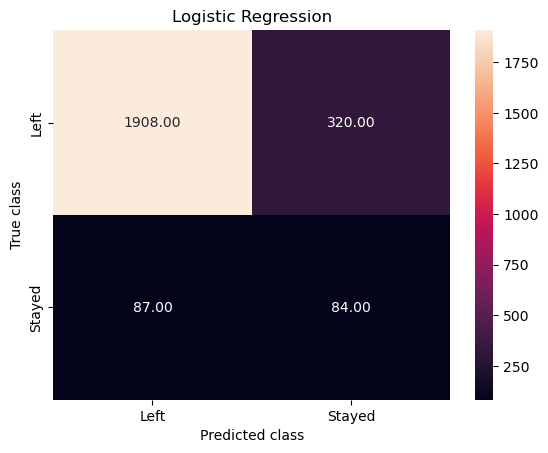

In [78]:
# Ploting confusion metrics
sns.heatmap(lr_cm, annot=True, fmt='.2f',
xticklabels = ["Left", "Stayed"] ,
yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')